In [1]:
import numpy as np
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, PCA, SparsePCA, NMF, ProjectedGradientNMF, LatentDirichletAllocation
from sklearn.mixture import GaussianMixture
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
import networkx as nx
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, LassoLars
from sklearn.cluster import KMeans
import random
from sklearn.svm import SVC


### Load Case-Centered Data into Pandas DF

In [2]:
trainX = pd.read_csv('../data/trainX_num_output.csv')
trainY = pd.read_csv('../data/trainY.csv')['partyWinning']
testX = pd.read_csv('../data/testX_num_output.csv')
testY = pd.read_csv('../data/testY.csv')['partyWinning']

### Feature Selection

In [3]:
""" Get DataFrame of feature names using different types of feature selection. """
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold, RFE

skb = SelectKBest(chi2, k=10)
X_new = skb.fit_transform(trainX, trainY)

In [5]:
X_new.shape

(8577, 10)

### Classify

In [10]:
# testX[pd.DataFrame(X_new).columns]

In [13]:
rnb = RandomForestClassifier()
rnb.fit(trainX, trainY)

knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn.fit(trainX, trainY)

gnb = GaussianNB()
gnb.fit(trainX, trainY)

# mnb = MultinomialNB()
# mnb.fit(trainX, trainY['partyWinning'])

bnb = BernoulliNB()
bnb.fit(trainX, trainY)

dt = DecisionTreeClassifier()
dt.fit(trainX, trainY)

# svc = SVC(kernel='linear')
# svc.fit(trainX, trainY)

log_reg = LogisticRegression()
log_reg.fit(trainX, trainY)

log_reg_l1 = LogisticRegression(penalty='l1')
log_reg_l1.fit(trainX, trainY)

lr = LinearRegression()
lr.fit(trainX, trainY)

ridge = Ridge(alpha=0.5)
ridge.fit(trainX, trainY)

lasso = Lasso(alpha=0.1)
lasso.fit(trainX, trainY)

lasso_lars = LassoLars(alpha=.2)
lasso_lars.fit(trainX, trainY)


LassoLars(alpha=0.2, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

### with feature selection

In [12]:
rnb_fs = RandomForestClassifier()
rnb_fs.fit(X_new, trainY)

knn_fs = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_fs.fit(X_new, trainY)

gnb_fs = GaussianNB()
gnb_fs.fit(X_new, trainY)

# mnb = MultinomialNB()
# mnb.fit(trainX, trainY['partyWinning'])

bnb_fs = BernoulliNB()
bnb_fs.fit(X_new, trainY)

dt_fs = DecisionTreeClassifier()
dt_fs.fit(X_new, trainY)

# svc = SVC(kernel='linear')
# svc.fit(trainX, trainY)

log_reg_fs = LogisticRegression()
log_reg_fs.fit(X_new, trainY)

log_reg_l1_fs = LogisticRegression(penalty='l1')
log_reg_l1_fs.fit(X_new, trainY)

lr_fs = LinearRegression()
lr_fs.fit(X_new, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
ridge_fs = Ridge(alpha=0.5)
ridge_fs.fit(X_new, trainY)

lasso_fs = Lasso(alpha=0.1)
lasso_fs.fit(X_new, trainY)

lasso_lars_fs = LassoLars(alpha=.2)
lasso_lars_fs.fit(X_new, trainY)

LassoLars(alpha=0.2, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

### results without feature selection

In [17]:
y_pred = rnb.predict(testX)

print("RNB")
print("accuracy: " + str(accuracy_score(testY,y_pred)))
print("precision: " + str(precision_score(testY,y_pred, average='weighted')))
print("recall: " + str(recall_score(testY,y_pred, average='weighted')))
print("f1: " + str(f1_score(testY,y_pred, average='weighted')))

y_pred = knn.predict(testX)

print("KNN")
print("accuracy: " + str(accuracy_score(testY,y_pred)))
print("precision: " + str(precision_score(testY,y_pred, average='weighted')))
print("recall: " + str(recall_score(testY,y_pred, average='weighted')))
print("f1: " + str(f1_score(testY,y_pred, average='weighted')))

y_pred = gnb.predict(testX)

print("GNB")
print("accuracy: " + str(accuracy_score(testY,y_pred)))
print("precision: " + str(precision_score(testY,y_pred, average='weighted')))
print("recall: " + str(recall_score(testY,y_pred, average='weighted')))
print("f1: " + str(f1_score(testY,y_pred, average='weighted')))

y_pred = bnb.predict(testX)

print("BNB")
print("accuracy: " + str(accuracy_score(testY,y_pred)))
print("precision: " + str(precision_score(testY,y_pred, average='weighted')))
print("recall: " + str(recall_score(testY,y_pred, average='weighted')))
print("f1: " + str(f1_score(testY,y_pred, average='weighted')))

y_pred = dt.predict(testX)

print("DT")
print("accuracy: " + str(accuracy_score(testY,y_pred)))
print("precision: " + str(precision_score(testY,y_pred, average='weighted')))
print("recall: " + str(recall_score(testY,y_pred, average='weighted')))
print("f1: " + str(f1_score(testY,y_pred, average='weighted')))

RNB
accuracy: 0.847222222222
precision: 0.845985352538
recall: 0.847222222222
f1: 0.84642650463
KNN
accuracy: 0.513888888889
precision: 0.503900112233
recall: 0.513888888889
f1: 0.508557554045
GNB
accuracy: 0.625
precision: 0.635478670635
recall: 0.625
f1: 0.608994276988
BNB
accuracy: 0.638888888889
precision: 0.433531746032
recall: 0.638888888889
f1: 0.516548463357
DT
accuracy: 0.729166666667
precision: 0.725478778468
recall: 0.729166666667
f1: 0.726995273157


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### results with feature selection

In [15]:
testX_fs = testX[pd.DataFrame(X_new).columns]

y_pred = rnb_fs.predict(testX_fs)

print("RNB")
print("accuracy: " + str(accuracy_score(testY,y_pred)))
print("precision: " + str(precision_score(testY,y_pred, average='weighted')))
print("recall: " + str(recall_score(testY,y_pred, average='weighted')))
print("f1: " + str(f1_score(testY,y_pred, average='weighted')))

y_pred = knn_fs.predict(testX_fs)

print("KNN")
print("accuracy: " + str(accuracy_score(testY,y_pred)))
print("precision: " + str(precision_score(testY,y_pred, average='weighted')))
print("recall: " + str(recall_score(testY,y_pred, average='weighted')))
print("f1: " + str(f1_score(testY,y_pred, average='weighted')))

y_pred = gnb_fs.predict(testX_fs)

print("GNB")
print("accuracy: " + str(accuracy_score(testY,y_pred)))
print("precision: " + str(precision_score(testY,y_pred, average='weighted')))
print("recall: " + str(recall_score(testY,y_pred, average='weighted')))
print("f1: " + str(f1_score(testY,y_pred, average='weighted')))

y_pred = bnb_fs.predict(testX_fs)

print("BNB")
print("accuracy: " + str(accuracy_score(testY,y_pred)))
print("precision: " + str(precision_score(testY,y_pred, average='weighted')))
print("recall: " + str(recall_score(testY,y_pred, average='weighted')))
print("f1: " + str(f1_score(testY,y_pred, average='weighted')))

y_pred = dt_fs.predict(testX_fs)

print("DT")
print("accuracy: " + str(accuracy_score(testY,y_pred)))
print("precision: " + str(precision_score(testY,y_pred, average='weighted')))
print("recall: " + str(recall_score(testY,y_pred, average='weighted')))
print("f1: " + str(f1_score(testY,y_pred, average='weighted')))

RNB
accuracy: 0.548611111111
precision: 0.576774084273
recall: 0.548611111111
f1: 0.558467365671
KNN
accuracy: 0.604166666667
precision: 0.564583333333
recall: 0.604166666667
f1: 0.574558879939
GNB
accuracy: 0.597222222222
precision: 0.563552188552
recall: 0.597222222222
f1: 0.573568684716
BNB
accuracy: 0.416666666667
precision: 0.498189936894
recall: 0.416666666667
f1: 0.428803016508
DT
accuracy: 0.555555555556
precision: 0.594710430531
recall: 0.555555555556
f1: 0.566782500223


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### without fs

In [8]:
y_pred = log_reg.predict(testX)

print("Log reg")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

y_pred = lr.predict(testX)
print("LR")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

y_pred = log_reg_l1.predict(testX)
print("log reg l1")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

y_pred = ridge.predict(testX)
print("ridge")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

y_pred = lasso.predict(testX)
print("Lasso")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

y_pred = lasso_lars.predict(testX)
print("LassoLars")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

Log reg
RMSE: 0.347222222222
R^2: -0.546723952739
LR
RMSE: 0.22691211933
R^2: -0.0107947811856
log reg l1
RMSE: 0.361111111111
R^2: -0.608592910849
ridge
RMSE: 0.226871251652
R^2: -0.010612733459
Lasso
RMSE: 0.21984633654
R^2: 0.0206802074136
LassoLars
RMSE: 0.224911977928
R^2: -0.00188502133374


### with fs

In [18]:
testX_fs = testX[pd.DataFrame(X_new).columns]

y_pred = log_reg_fs.predict(testX_fs)

print("Log reg")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

y_pred = lr_fs.predict(testX_fs)
print("LR")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

y_pred = log_reg_l1_fs.predict(testX_fs)
print("log reg l1")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

y_pred = ridge_fs.predict(testX_fs)
print("ridge")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

y_pred = lasso_fs.predict(testX_fs)
print("Lasso")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

y_pred = lasso_lars_fs.predict(testX_fs)
print("LassoLars")
print("RMSE: " + str(mean_squared_error(testY, y_pred)))
print("R^2: " + str(r2_score(testY, y_pred)))

Log reg
RMSE: 0.340277777778
R^2: -0.515789473684
LR
RMSE: 4.58348670136
R^2: -19.417439364
log reg l1
RMSE: 0.340277777778
R^2: -0.515789473684


NameError: name 'ridge_fs' is not defined

### ROC Curves for Classifiers

In [53]:
classifiers = [gnb, rnb, knn, bnb, dt]
clf_labels = {gnb: "gnb",rnb: "rnb",knn: "knn",bnb: "bnb",dt: "dt"}

def plot_ROC(fpr, tpr, roc_auc, l):
    label_end = ': AUC = %0.5f' % roc_auc
    label = l + label_end
    lw = 2
    r = lambda: random.randint(0, 255)
    c = '#%02X%02X%02X' % (r(),r(),r())
    plt.plot(fpr, tpr, color=c,
             lw=lw, label=label)


# def calcROC(clf, test_feature, test_class, label):
#     predict_probas = clf.predict_proba(test_feature)[:,1]
#     fpr, tpr, _ = roc_curve(test_class, predict_probas)
#     roc_auc = auc(fpr, tpr)
#     # lb = 'BOW-NB' + label
#     plot_ROC(fpr, tpr, roc_auc, label)

def calcROC(clf, X, y_true):
    y_pred = clf.predict_proba(X)[:,1]
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    # lb = 'BOW-NB' + label
    plot_ROC(fpr, tpr, roc_auc, clf_labels[clf])

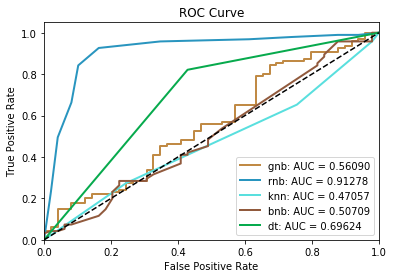

In [54]:
for clf in classifiers:
    y_true = testY
    calcROC(clf, testX, y_true)
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [91]:
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,
                                  LassoLarsCV)

from sklearn.linear_model import lasso_path

_, coef_path, _ = lasso_path(trainX, trainY, alphas=[5., 1., .5])

# Plot stability selection path, using a high eps for early stopping
# of the path, to save computation time
alpha_grid, scores_path = lasso_stability_path(trainX.values, trainY.values, random_state=42,
                                                   eps=0.05)

coef = coef_path

plt.figure()
# We plot the path as a function of alpha/alpha_max to the power 1/3: the
# power 1/3 scales the path less brutally than the log, and enables to
# see the progression along the path
hg = plt.plot(alpha_grid[1:] ** .333, scores_path[coef != 0].T[1:], 'r')
hb = plt.plot(alpha_grid[1:] ** .333, scores_path[coef == 0].T[1:], 'k')
ymin, ymax = plt.ylim()
plt.xlabel(r'$(\alpha / \alpha_{max})^{1/3}$')
plt.ylabel('Stability score: proportion of times selected')
plt.title('Stability Scores Path - Mutual incoherence: %.1f' % mi)
plt.axis('tight')
plt.legend((hg[0], hb[0]), ('relevant features', 'irrelevant features'),
               loc='best')
    
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 3


IndexError: index 2 is out of bounds for axis 1 with size 2

In [89]:
from sklearn.linear_model import lasso_path

_, coef_path, _ = lasso_path(trainX, trainY, alphas=[5., 1., .5])

In [90]:
coef_path

array([[ -3.46519134e-07,  -4.03255038e-07,  -4.54295209e-07],
       [ -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,  -5.57956407e-05,  -7.33814049e-05],
       [  0.00000000e+00,   2.14651659e-05,   6.14148495e-05],
       [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   1.61028315e-05,   7.82164510e-05],
       [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.0000000

In [92]:
print(__doc__)

# Author: Alexandre Gramfort and Gael Varoquaux
# License: BSD 3 clause

import warnings

import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,
                                  LassoLarsCV)
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, precision_recall_curve
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.utils.extmath import pinvh
from sklearn.exceptions import ConvergenceWarning


def mutual_incoherence(X_relevant, X_irelevant):
    """Mutual incoherence, as defined by formula (26a) of [Wainwright2006].
    """
    projector = np.dot(np.dot(X_irelevant.T, X_relevant),
                       pinvh(np.dot(X_relevant.T, X_relevant)))
    return np.max(np.abs(projector).sum(axis=1))


for conditioning in (1, 1e-4):
    ###########################################################################
    # Simulate regression data with a correlated design
    n_features = 501
    n_relevant_features = 3
    noise_level = .2
    coef_min = .2
    # The Donoho-Tanner phase transition is around n_samples=25: below we
    # will completely fail to recover in the well-conditioned case
    n_samples = 25
    block_size = n_relevant_features

    rng = np.random.RandomState(42)

    # The coefficients of our model
    coef = np.zeros(n_features)
    coef[:n_relevant_features] = coef_min + rng.rand(n_relevant_features)

#     # The correlation of our design: variables correlated by blocs of 3
#     corr = np.zeros((n_features, n_features))
#     for i in range(0, n_features, block_size):
#         corr[i:i + block_size, i:i + block_size] = 1 - conditioning
#     corr.flat[::n_features + 1] = 1
#     corr = linalg.cholesky(corr)

#     # Our design
#     X = rng.normal(size=(n_samples, n_features))
#     X = np.dot(X, corr)
#     # Keep [Wainwright2006] (26c) constant
#     X[:n_relevant_features] /= np.abs(
#         linalg.svdvals(X[:n_relevant_features])).max()
#     X = StandardScaler().fit_transform(X.copy())

#     # The output variable
#     y = np.dot(X, coef)
#     y /= np.std(y)
#     # We scale the added noise as a function of the average correlation
#     # between the design and the output variable
#     y += noise_level * rng.normal(size=n_samples)
#     mi = mutual_incoherence(X[:, :n_relevant_features],
#                             X[:, n_relevant_features:])

#     ###########################################################################
#     # Plot stability selection path, using a high eps for early stopping
#     # of the path, to save computation time
#     alpha_grid, scores_path = lasso_stability_path(X, y, random_state=42,
#                                                    eps=0.05)

#     plt.figure()
#     # We plot the path as a function of alpha/alpha_max to the power 1/3: the
#     # power 1/3 scales the path less brutally than the log, and enables to
#     # see the progression along the path
#     hg = plt.plot(alpha_grid[1:] ** .333, scores_path[coef != 0].T[1:], 'r')
#     hb = plt.plot(alpha_grid[1:] ** .333, scores_path[coef == 0].T[1:], 'k')
#     ymin, ymax = plt.ylim()
#     plt.xlabel(r'$(\alpha / \alpha_{max})^{1/3}$')
#     plt.ylabel('Stability score: proportion of times selected')
#     plt.title('Stability Scores Path - Mutual incoherence: %.1f' % mi)
#     plt.axis('tight')
#     plt.legend((hg[0], hb[0]), ('relevant features', 'irrelevant features'),
#                loc='best')

#     ###########################################################################
#     # Plot the estimated stability scores for a given alpha

#     # Use 6-fold cross-validation rather than the default 3-fold: it leads to
#     # a better choice of alpha:
#     # Stop the user warnings outputs- they are not necessary for the example
#     # as it is specifically set up to be challenging.
#     with warnings.catch_warnings():
#         warnings.simplefilter('ignore', UserWarning)
#         warnings.simplefilter('ignore', ConvergenceWarning)
#         lars_cv = LassoLarsCV(cv=6).fit(X, y)

#     # Run the RandomizedLasso: we use a paths going down to .1*alpha_max
#     # to avoid exploring the regime in which very noisy variables enter
#     # the model
#     alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 6)
#     clf = RandomizedLasso(alpha=alphas, random_state=42).fit(X, y)
#     trees = ExtraTreesRegressor(100).fit(X, y)
#     # Compare with F-score
#     F, _ = f_regression(X, y)

#     plt.figure()
#     for name, score in [('F-test', F),
#                         ('Stability selection', clf.scores_),
#                         ('Lasso coefs', np.abs(lars_cv.coef_)),
#                         ('Trees', trees.feature_importances_),
#                         ]:
#         precision, recall, thresholds = precision_recall_curve(coef != 0,
#                                                                score)
#         plt.semilogy(np.maximum(score / np.max(score), 1e-4),
#                      label="%s. AUC: %.3f" % (name, auc(recall, precision)))

#     plt.plot(np.where(coef != 0)[0], [2e-4] * n_relevant_features, 'mo',
#              label="Ground truth")
#     plt.xlabel("Features")
#     plt.ylabel("Score")
#     # Plot only the 100 first coefficients
#     plt.xlim(0, 100)
#     plt.legend(loc='best')
#     plt.title('Feature selection scores - Mutual incoherence: %.1f'
#               % mi)

# plt.show()

 Get DataFrame of feature names using different types of feature selection. 


In [93]:
coef

array([ 0.57454012,  1.15071431,  0.93199394,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  